TODO: 

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "./dataset/pt_meta/pt_meta_part_64.jsonl"


# Polars

In [3]:
pl_df = pl.read_ndjson(path)

pl_df.head(3)

content,warc_headers,metadata
str,struct[9],struct[6]
"""e ou não em Qu…","{""897"",""sha1:NXYA4DGHS3B74CKLJZQUUTXCQ66WBH4B"",""conversion"",""<urn:uuid:d91e2362-8a82-408a-b96f-4af4044f2289>"",""<urn:uuid:3e3847b4-2043-407b-90ac-573c564cd26a>"",""2022-12-04T08:59:00Z"",""por,eng"",""text/plain"",""https://nrocatalogue.norfolk.gov.uk/index.php/informationobject/browse?sort=endDate&view=card&sortDir=desc&levels=482&sf_culture=pt&genres=3803922&showAdvanced=1&topLod=0""}","{{""pt"",0.7385287},13782.712,""tlsh:T1A4674F1104431504A7F436C5B56EA7A00469990062E56AD441FD814B65367CE7586A5D1377EA9F8642D218070380B9047DE3F953F71D3643C682C2EB0BB178426BBEA9569D"",[""short_sentences""],[""examen_pix""],[{""pt"",0.978462}, {""pt"",0.91492}, … {""pt"",0.953725}]}"
"""Jejum natural …","{""3185"",""sha1:ELEQ2HJXRUROQS5NON25AUVF36JWODH6"",""conversion"",""<urn:uuid:231df76b-ccc4-463a-88cd-c7531e499f36>"",""<urn:uuid:ef2f553b-40ec-4f82-974c-a7c744ac9082>"",""2022-12-04T08:01:53Z"",""por"",""text/plain"",""https://nutridados.com/site/category/jejum/""}","{{""pt"",0.8846815},3134.7778,""tlsh:T16960B26153197B01AFF2C2C074FBF78654B0F254F9A4FBD8C23E9379C4BAF9C10B455617B13815CA326506218382B64BDB87DFA4C215E045DAC1B6EB0B1E71C9982E218BA5"",[""short_sentences""],null,[{""pt"",0.979707}, {null,null}, … {""pt"",0.9972714}]}"
"""Semana em come…","{""3684"",""sha1:R7AZSF3ICN76X2IN7FPFAQPDHGI37JGE"",""conversion"",""<urn:uuid:3f488d10-cc7a-4b3f-9d52-9019d2e949ed>"",""<urn:uuid:152770ab-c960-4fd5-a978-ec5b2a6b4458>"",""2022-12-04T09:56:14Z"",""por"",""text/plain"",""https://oabniteroi.org/semana-em-comemoracao-ao-dia-mundial-da-pessoa-idosa-promovida-pela-oab-niteroi-tem-palestras-sobre-idadismo-envelhecimento-da-mulher-negra-e-protecao-f/""}","{{""pt"",0.785124},7271.6475,""tlsh:T19A82E57196CB97111FEB06E0EBED578038F8A184F598EB54AB9BD3F2437DB0099948D951B33C2BD2176509F313827346C51B84988D80A27E4387977DCB57E9CDB14D53AA80"",[""short_sentences"", ""header"", ""footer""],null,[{""pt"",0.9685009}, {null,null}, … {""pt"",0.9924929}]}"


In [4]:
# Functions to filter the nested jsons
def return_tlsh(dataframe):
    return dataframe['tlsh']

def return_pp(dataframe):
    return dataframe['harmful_pp']

def return_qw(dataframe):
    return dataframe['quality_warnings']


In [5]:
tlsh_list = list(map(return_tlsh, pl_df[:,2]))
harmful_pp_list = list(map(return_pp, pl_df[:,2]))
qw_list = list(map(return_qw, pl_df[:,2]))

In [6]:
new_df = pl.DataFrame({'content': pl_df[:,0], 'tlsh':tlsh_list, 'harmful_pp':harmful_pp_list, 'quality_warnings':qw_list})
new_df = new_df.sort("harmful_pp")

In [8]:
# Filtering adult content
if 0 == 1:
    def is_adult(tags):
        try:
            if 'adult' in tags:
                return True
            else:
                return False
        except TypeError:
            return False


    filter_df = new_df.filter(list(map(is_adult, new_df["quality_warnings"])))

    boll = list(map(is_adult, new_df["quality_warnings"]))
    #print(new_df["quality_warnings"])
    #print(boll)

IndentationError: unexpected indent (2012715696.py, line 2)

## Qualitative analysis

In [ ]:
# used this small function to plot different intervals of harmfull_pp and look into them in the VSCode text editor 

def print_interval(dataframe, lower, upper):
    for row in dataframe.filter((pl.col('harmful_pp') > lower) & (pl.col('harmful_pp') < upper)).select(['content','harmful_pp']).iter_rows():
        print(str(row[1]) + ' - ' + row[0] +'\n\n')


# for content in new_df.sort('harmful_pp').tail(1000).iter_rows():
#     print("{} - {}\n\n".format(content[0],content[2]))
print_interval(new_df, 2000,2050)

## Plots

In [8]:
def std_filter(dataframe,n_std):
    """Filter the dataframe according to the standard deviation of the harmful_pp
    """
    std = dataframe['harmful_pp'].std()
    mean = dataframe['harmful_pp'].mean()
    lower = mean - n_std*std
    upper = mean + n_std*std
    return dataframe.filter((pl.col('harmful_pp') > lower) & (pl.col('harmful_pp') < upper))

def interval_filter(dataframe, interval:list) -> pl.dataframe:
    return dataframe.filter((pl.col('harmful_pp') > interval[0]) & (pl.col('harmful_pp') < interval[1]))

def str_describe(dataframe,column):
    return '\n'.join([str(row[0]) + '    ' + str(row[1]) for row in dataframe[column].describe().iter_rows()])



In [9]:
sns.set(rc={"figure.figsize":(16, 9)})


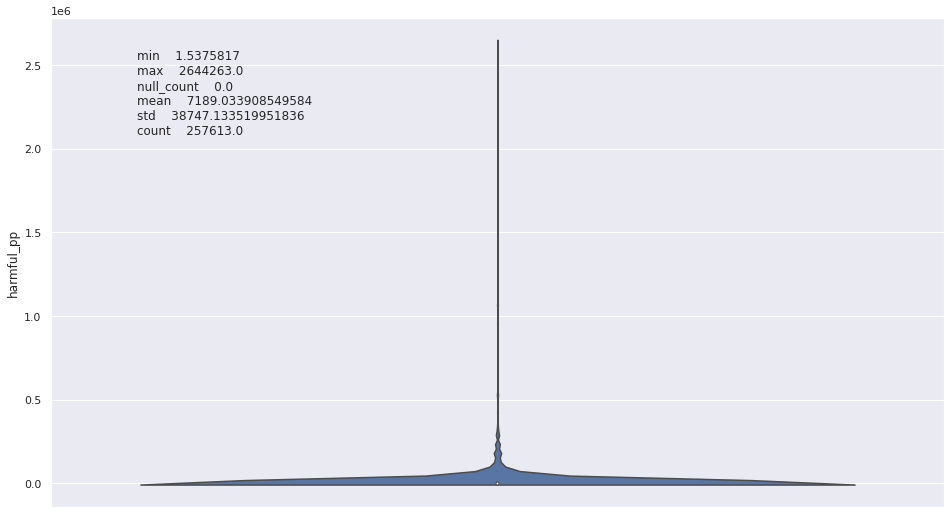

In [10]:
sns.violinplot(y = new_df['harmful_pp'],cut=0)
plt.figtext(0.2, 0.7, str_describe(new_df,'harmful_pp'))
plt.show()

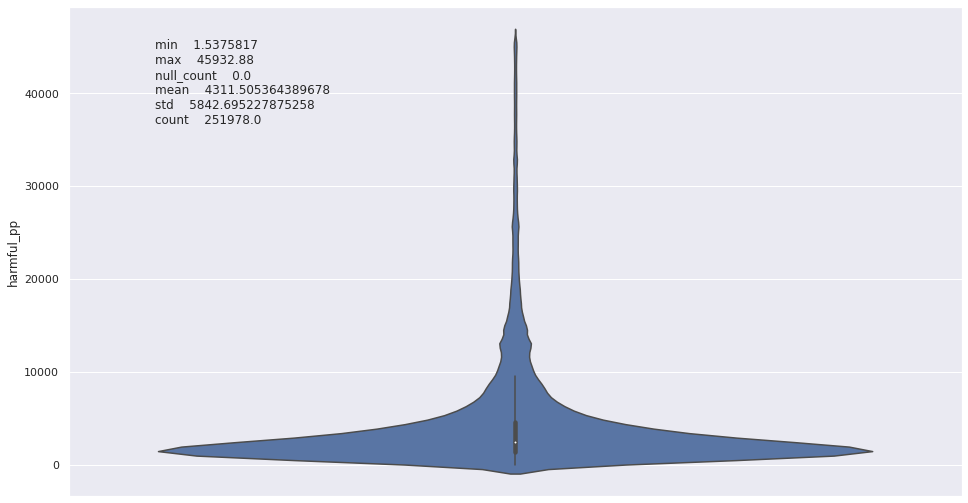

In [11]:
filtered = std_filter(new_df,1)

sns.violinplot(y = filtered['harmful_pp'],cut=0)
plt.figtext(0.2, 0.7, str_describe(filtered,'harmful_pp'))
plt.show()

In [ ]:
filtered_2 = std_filter(new_df,0.5)

sns.violinplot(y = filtered_2['harmful_pp'],cut=0)
plt.figtext(0.2, 0.7, str_describe(filtered_2,'harmful_pp'))
plt.show()
def filtered_2

In [ ]:
# PLotting filtered by perplexity interval - 0:20

#filtered_perplexity = interval_filter(new_df,[0,2000])
#sns.violinplot(y = filtered_perplexity['harmful_pp'],cut=0)
#plt.figtext(0.2, 0.7, str_describe(filtered_perplexity,'harmful_pp'))
#plt.show()
#del filtered_perplexity